In [1]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

In [2]:
import numpy as np
import dill
import os


class Data:
    def __init__(self, column_names, data):
        
        self.names = column_names
        self.data = data
        
        n = {}
        for key, value in enumerate(self.names):
            n[value] = key
        self.n = n
        
    def get(self, *args) -> np.ndarray:
        out = []
        for arg in args:
            out.append(self.data[:, self.n[arg]])
        out = np.asarray(out)
        if len(args) == 1:
            return out[0]
        return out
        
    def dist(self, prefix: str) -> 'Data':
        cond = np.asarray([str(distr_name).find(prefix) + 1
                           for distr_name in self.get('distr_name')], dtype=bool)
        return Data(column_names=self.names, data=self.data[cond])
        
    def select(self, **kwargs) -> 'Data':
        cond = np.asarray([True for _ in range(len(self.data))])
        for key, value in kwargs.items():
            d = self.get(str(key)).astype(type(value))
            if not isinstance(value, str):
                cond = np.isclose(d, value) & cond
            else:
                cond = (d == value) & cond
        return Data(column_names=self.names, data=self.data[cond])
    

def means(arr) -> np.ndarray:
    return np.asarray([val.mean for val in arr])

def mins(arr) -> np.ndarray:
    return np.asarray([val.min for val in arr])

def maxs(arr) -> np.ndarray:
    return np.asarray([val.max for val in arr])


def bind(*arrays):
    return tuple(np.asarray(sorted(list(zip(*arrays)), key=lambda e: e[0])).T)


linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))
}

In [3]:
with open('post_data_theta0_kernel60_all.bin', 'rb') as dump:
    data = dill.load(dump)

In [4]:
# data[0]

In [5]:
data = Data(column_names=data[0], data=data[1:])

In [ ]:
# len(data.data)

In [ ]:
# len(data.dist('L2').data)

In [ ]:
# len(data.dist('L3').data)

In [ ]:
# percentages = np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))
# percentages

In [ ]:
# eta, *W = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
#        'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#     )

# eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

# plt.figure()
# plt.plot(eta, W_true, marker='x', color='black', linewidth=2)
# plt.plot(eta, Wr, marker='x', color='crimson', linewidth=1.5)
# plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5)

In [ ]:
# plt.figure()

# # plt.title('L2')

# eta, *W = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
#        'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#     )

# eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

# plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
# plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.2f}%'.format(0.23423))

# plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
# plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


# eta, *W = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=36).get(
#        'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#     )

# eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

# plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
# plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

# plt.xlabel(r'Parameter $\eta$, dimensionless')
# plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')

In [ ]:
# plt.figure()

# # plt.title('L2')

# eta, *Q = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
#        'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#     )

# eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

# plt.plot(eta, Q_true, marker='x', color='black', linewidth=2, linestyle='-')
# plt.text(np.min(eta), 2.2, 'Cloud amount: {:.2f}%'.format(0.23423))

# plt.plot(eta, Qr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
# plt.plot(eta, Qrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


# eta, *Q = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=36).get(
#        'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#     )

# eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

# plt.plot(eta, Qr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
# plt.plot(eta, Qrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

# plt.xlabel(r'Parameter $\eta$, dimensionless')
# plt.ylabel(r'Retrieved TWV in a resolution element, g/cm$^2$')

### Generate animations (dynamic y-axis)

#### eta variance

##### LWC

In [ ]:
# savepath = os.path.join('fig', 'L2', 'eta_variance', 'LWC')
# if not os.path.exists(savepath):
#     os.makedirs(savepath)

# for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))):
    
#     plt.figure()

#     # plt.title('L2')

#     eta, *W = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
#            'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
#     plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

#     plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
#     plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


#     eta, *W = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
#            'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
#     plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

#     plt.xlabel(r'Parameter $\eta$, dimensionless')
#     plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')
    
#     plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

In [ ]:
# savepath = os.path.join('fig', 'L2', 'eta_variance', 'TWV')
# if not os.path.exists(savepath):
#     os.makedirs(savepath)

# for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))):
    
#     plt.figure()

#     # plt.title('L2')

#     eta, *Q = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
#            'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#         )

#     eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

#     plt.plot(eta, Q_true, marker='x', color='black', linewidth=2, linestyle='-')
#     plt.text(np.min(eta), 2.2, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

#     plt.plot(eta, Qr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
#     plt.plot(eta, Qrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


#     eta, *Q = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
#            'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#         )

#     eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

#     plt.plot(eta, Qr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
#     plt.plot(eta, Qrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

#     plt.xlabel(r'Parameter $\eta$, dimensionless')
#     plt.ylabel(r'Retrieved TWV in a resolution element, g/cm$^2$')
    
#     plt.ylim((1.41, 2.4))
    
#     plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

#### beta variance

##### LWC

In [ ]:
# savepath = os.path.join('fig', 'L2', 'beta_variance', 'LWC')
# if not os.path.exists(savepath):
#     os.makedirs(savepath)

# for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))):
    
#     plt.figure()

#     # plt.title('L2')

#     eta, *W = \
#         data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
#            'beta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
#     plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

#     plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
#     plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


#     eta, *W = \
#         data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
#            'beta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
#     plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

#     plt.xlabel(r'Parameter $\beta$, dimensionless')
#     plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')
    
#     plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

### Generate animations (fixed y-axis)

#### eta variance, beta fixed

In [ ]:
data.names

##### LWC

In [ ]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'eta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'Delta_Wrs'
        )
    eta, Delta_Wrs = bind(eta, *W)
    plt.plot(eta, means(Delta_Wrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(eta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(eta[eta==0.93], means(Delta_Wrs)[eta==0.93], marker='o', color='darkblue', zorder=999)

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'Delta_Wrs'
        )
    eta, Delta_Wrs = bind(eta, *W)
    plt.plot(eta, means(Delta_Wrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(eta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(eta[eta==0.93], means(Delta_Wrs)[eta==0.93], marker='o', color='forestgreen', zorder=998)
    
    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=89).get(
           'eta', 'W_TRUE', 'Delta_Wrs'
        )
    eta, W_TRUE, Delta_Wrs = bind(eta, *W)
    plt.plot(eta, means(Delta_Wrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(eta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(eta[eta==0.93], means(Delta_Wrs)[eta==0.93], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'LWC delta in a resolution element, kg/m$^2$')
    
    plt.ylim((-0.09, 1.3))
    plt.text(np.min(eta), 1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(eta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

In [ ]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'eta_variance', 'TWV')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    eta, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'Delta_Qrs'
        )
    eta, Delta_Qrs = bind(eta, *Q)
    plt.plot(eta, means(Delta_Qrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(eta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(eta[eta==0.93], means(Delta_Qrs)[eta==0.93], marker='o', color='darkblue', zorder=999)

    eta, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'Delta_Qrs'
        )
    eta, Delta_Qrs = bind(eta, *Q)
    plt.plot(eta, means(Delta_Qrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(eta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(eta[eta==0.93], means(Delta_Qrs)[eta==0.93], marker='o', color='forestgreen', zorder=998)
    
    eta, W_TRUE, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=89).get(
           'eta', 'W_TRUE', 'Delta_Qrs'
        )
    eta, W_TRUE, Delta_Qrs = bind(eta, W_TRUE, *Q)
    plt.plot(eta, means(Delta_Qrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(eta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(eta[eta==0.93], means(Delta_Qrs)[eta==0.93], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'TWV delta in a resolution element, g/cm$^2$')
    
    plt.ylim((0.09, -1.3))
    plt.text(np.min(eta), -1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(eta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

#### beta variance, eta fixed

##### LWC

In [ ]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'beta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    beta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
           'beta', 'Delta_Wrs'
        )
    beta, Delta_Wrs = bind(beta, *W)
    plt.plot(beta, means(Delta_Wrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(beta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(beta[beta==0.3], means(Delta_Wrs)[beta==0.3], marker='o', color='darkblue', zorder=999)

    beta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
           'beta', 'Delta_Wrs'
        )
    beta, Delta_Wrs = bind(beta, *W)
    plt.plot(beta, means(Delta_Wrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(beta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(beta[beta==0.3], means(Delta_Wrs)[beta==0.3], marker='o', color='forestgreen', zorder=998)
    
    beta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=89).get(
           'beta', 'W_TRUE', 'Delta_Wrs'
        )
    beta, W_TRUE, Delta_Wrs = bind(beta, *W)
    plt.plot(beta, means(Delta_Wrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(beta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(beta[beta==0.3], means(Delta_Wrs)[beta==0.3], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\beta$, dimensionless')
    plt.ylabel(r'LWC delta in a resolution element, kg/m$^2$')
    
    plt.ylim((-0.09, 1.3))
    plt.text(0.25, 1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(beta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

In [ ]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'beta_variance', 'TWV')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    beta, *Q = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
           'beta', 'Delta_Qrs'
        )
    beta, Delta_Qrs = bind(beta, *Q)
    plt.plot(beta, means(Delta_Qrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(beta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(beta[beta==0.3], means(Delta_Qrs)[beta==0.3], marker='o', color='darkblue', zorder=999)

    beta, *Q = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
           'beta', 'Delta_Qrs'
        )
    beta, Delta_Qrs = bind(beta, *Q)
    plt.plot(beta, means(Delta_Qrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(beta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(beta[beta==0.3], means(Delta_Qrs)[beta==0.3], marker='o', color='forestgreen', zorder=998)
    
    beta, W_TRUE, *Q = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=89).get(
           'beta', 'W_TRUE', 'Delta_Qrs'
        )
    beta, W_TRUE, Delta_Qrs = bind(beta, W_TRUE, *Q)
    plt.plot(beta, means(Delta_Qrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(beta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(beta[beta==0.3], means(Delta_Qrs)[beta==0.3], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\beta$, dimensionless')
    plt.ylabel(r'TWV delta in a resolution element, g/cm$^2$')
    
    plt.ylim((0.09, -1.3))
    plt.text(0.25, -1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(beta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

## Additional

In [7]:
base_distributions = [
    
    {'name': 'T8', 'alpha': 1.485, 'Dm': 4.02, 'dm': 0.06096, 'eta': 1.2, 'beta': 0.4, 'cl_bottom': 1.3716},
    {'name': 'T7', 'alpha': 1.35, 'Dm': 3.733, 'dm': 0.04572, 'eta': 1.2, 'beta': 0.0, 'cl_bottom': 1.24968},
    {'name': 'L2', 'alpha': 1.411, 'Dm': 4.026, 'dm': 0.02286, 'eta': 0.93, 'beta': 0.3, 'cl_bottom': 1.2192},
    
    {'name': 'L3', 'alpha': 1.485, 'Dm': 4.020, 'dm': 0.03048, 'eta': 0.76, 'beta': -0.3, 'cl_bottom': 1.3716},
    {'name': 'T6', 'alpha': 1.398, 'Dm': 3.376, 'dm': 0.03048, 'eta': 0.93, 'beta': -0.1, 'cl_bottom': 1.0668},
    
    {'name': 'T9', 'alpha': 2.485, 'Dm': 2.656, 'dm': 0.04572, 'eta': 1.3, 'beta': 0.3, 'cl_bottom': 1.40208},
    {'name': 'T5', 'alpha': 2.051, 'Dm': 2.574, 'dm': 0.02286, 'eta': 0.85, 'beta': -0.13, 'cl_bottom': 1.11252},
    {'name': 'T3', 'alpha': 2.361, 'Dm': 2.092, 'dm': 0.01524, 'eta': 0.93, 'beta': -0.1, 'cl_bottom': 0.82296},
    {'name': 'T4', 'alpha': 2.703, 'Dm': 2.094, 'dm': 0.02286, 'eta': 0.8, 'beta': 0.0, 'cl_bottom': 0.9144},
    {'name': 'L1', 'alpha': 3.853, 'Dm': 1.448, 'dm': 0.01524, 'eta': 0.98, 'beta': 0.0, 'cl_bottom': 0.54864},
    {'name': 'T2', 'alpha': 4.412, 'Dm': 1.126, 'dm': 0.01524, 'eta': 0.97, 'beta': 0.0, 'cl_bottom': 0.70104},
    {'name': 'T1', 'alpha': 9.07, 'Dm': 0.80485, 'dm': 0.01524, 'eta': 0.89, 'beta': 0.0, 'cl_bottom': 0.67056},
]

In [8]:
data.names

array(['angle', 'distr_no', 'distr_name', 'alpha', 'Dm', 'dm', 'eta',
       'beta', 'cl_bottom', 'xi', 'K', 'required_percentage', 'Q_TRUE',
       'W_TRUE', 'kernel', 'Q_true', 'W_true', 'efl_H', 'freq_pair_no',
       'nu1', 'nu2', 'tb_nu1', 'tb_nu2', 'tau_nu1', 'tau_nu2',
       'efl_tb_nu1', 'efl_tb_nu2', 'efl_tau_nu1', 'efl_tau_nu2', 'Qr',
       'Wr', 'Qrs', 'Wrs', 'Qrss', 'Wrss', 'Delta_Qr', 'Delta_Wr',
       'Delta_Qrs', 'Delta_Wrs', 'Delta_Qrss', 'Delta_Wrss', 'relerr_Qr',
       'relerr_Wr', 'relerr_Qrs', 'relerr_Wrs', 'relerr_Qrss',
       'relerr_Wrss'], dtype=object)

In [9]:
np.unique(data.get('required_percentage'))

array([0.2, 0.22631578947368422, 0.25263157894736843, 0.2789473684210526,
       0.30526315789473685, 0.3315789473684211, 0.35789473684210527,
       0.38421052631578945, 0.4105263157894737, 0.4368421052631579,
       0.4631578947368421, 0.48947368421052634, 0.5157894736842106,
       0.5421052631578946, 0.5684210526315789, 0.5947368421052632,
       0.6210526315789473, 0.6473684210526316, 0.6736842105263158, 0.7],
      dtype=object)

<IPython.core.display.Javascript object>


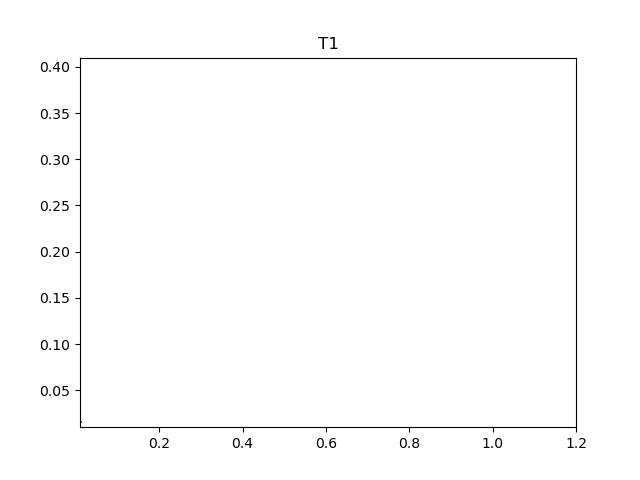

<IPython.core.display.Javascript object>


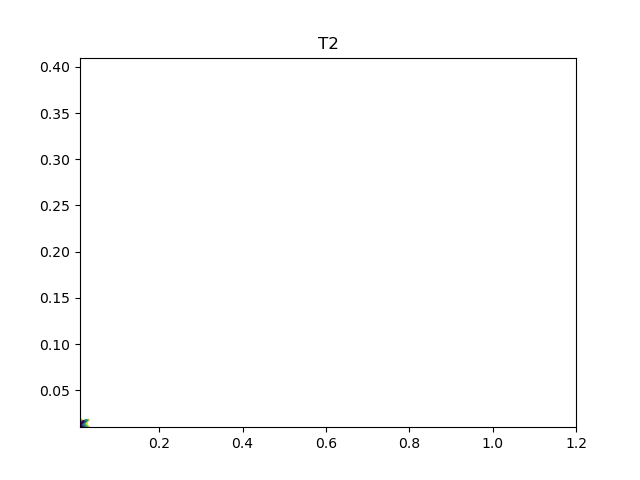

<IPython.core.display.Javascript object>


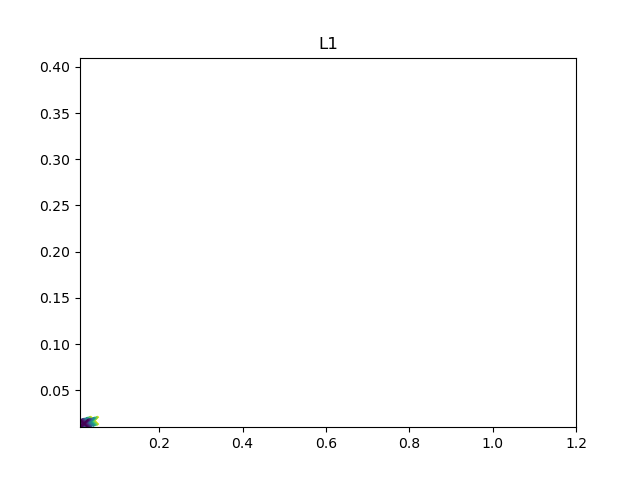

<IPython.core.display.Javascript object>


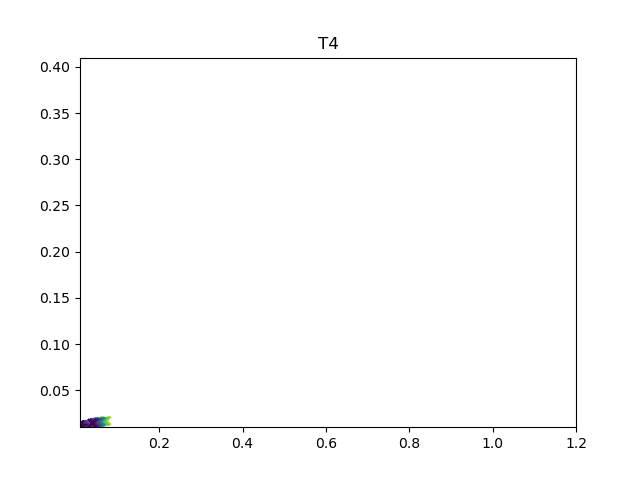

<IPython.core.display.Javascript object>


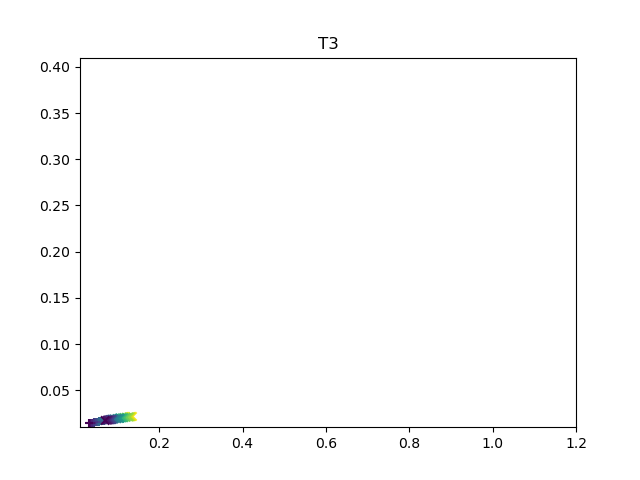

<IPython.core.display.Javascript object>


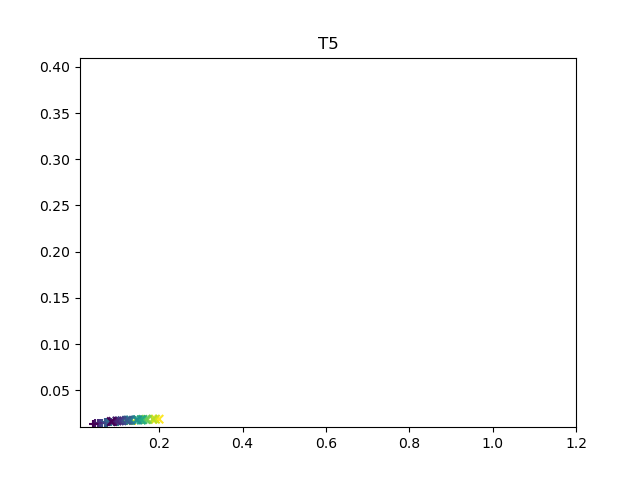

<IPython.core.display.Javascript object>


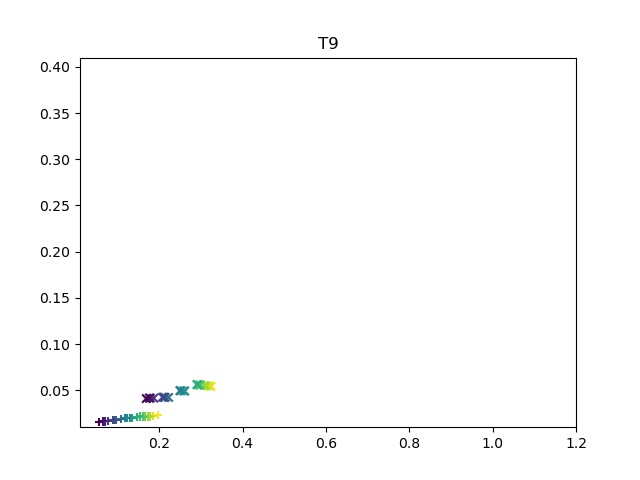

/tmp/ipykernel_32503/3036164809.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


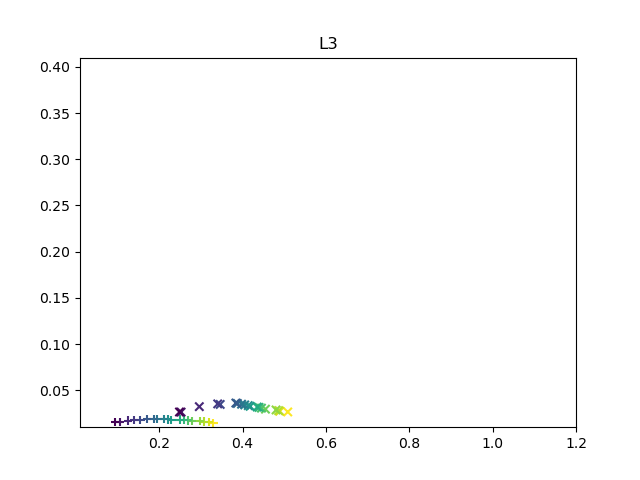

<IPython.core.display.Javascript object>


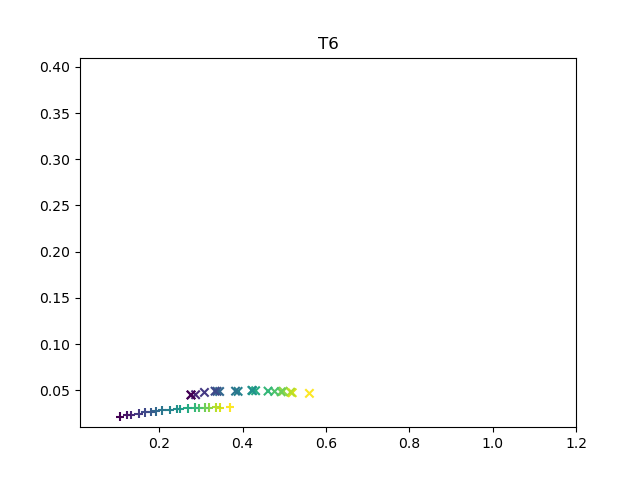

<IPython.core.display.Javascript object>


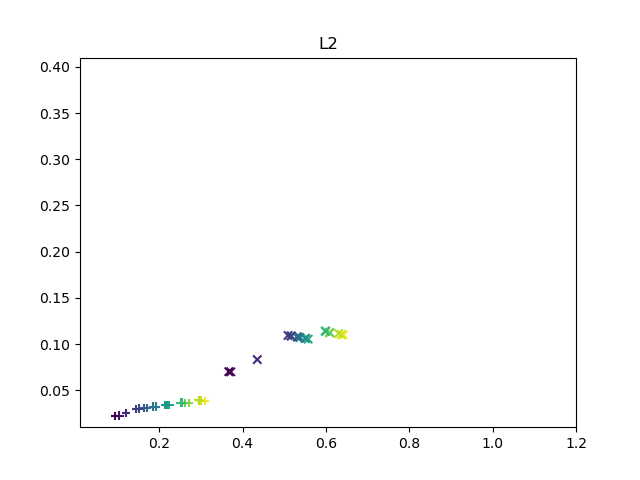

<IPython.core.display.Javascript object>


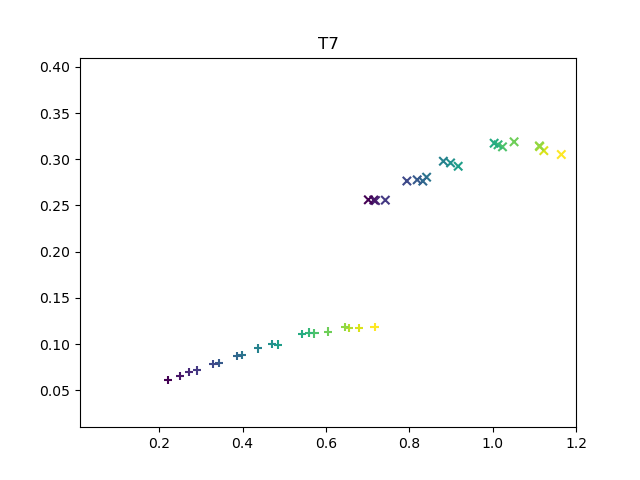

<IPython.core.display.Javascript object>


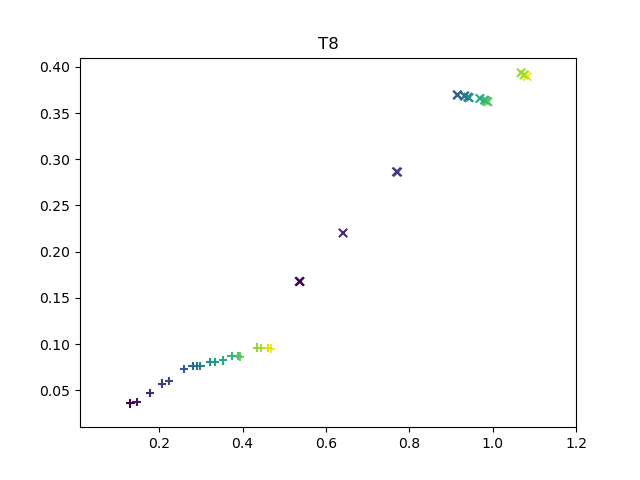

In [62]:
if not os.path.exists('./fig/Delta_Wrs_on_W_true/'):
    os.makedirs('./fig/Delta_Wrs_on_W_true/')
        
for i, distr in enumerate(base_distributions[::-1]):

    plt.figure()
    
    plt.title(distr['name'])

    d = data.select(distr_name=distr['name'], nu1=22.2, nu2=27)
    W_true = d.get('W_true')
    Delta_Wrs = d.get('Delta_Wrs')
    perc = d.get('required_percentage')
    perc /= perc.max()
    
    plt.scatter(means(W_true), means(Delta_Wrs), marker='+', c=perc)
    plt.scatter(maxs(W_true), maxs(Delta_Wrs), marker='x', c=perc)
    
    plt.ylim((0.01, 0.41))
    plt.xlim((0.01, 1.2))
    
    
#     plt.yscale('log')
    
#     plt.savefig('./fig/Delta_Wrs_on_W_true/' + distr['name'] + '.png', dpi=300)
    plt.savefig('./fig/Delta_Wrs_on_W_true/{}.png'.format(str(i).zfill(2)), dpi=300)

<IPython.core.display.Javascript object>


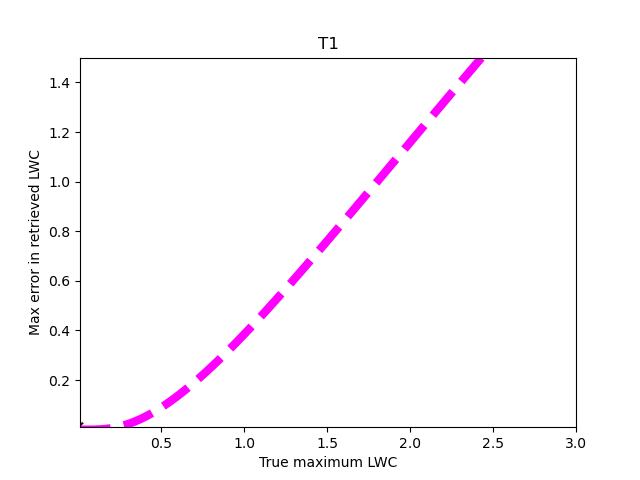

<IPython.core.display.Javascript object>


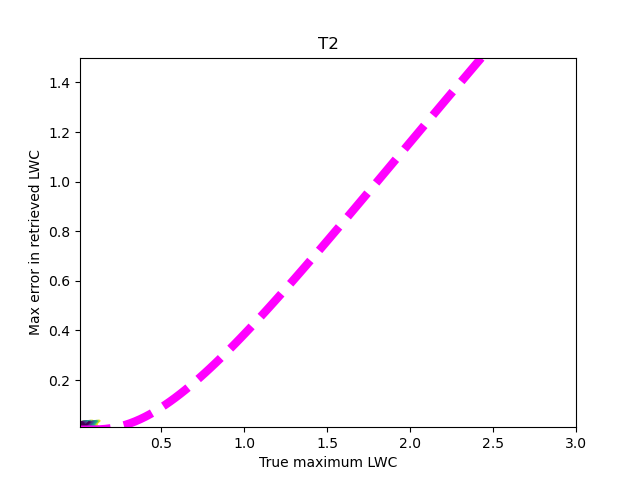

<IPython.core.display.Javascript object>


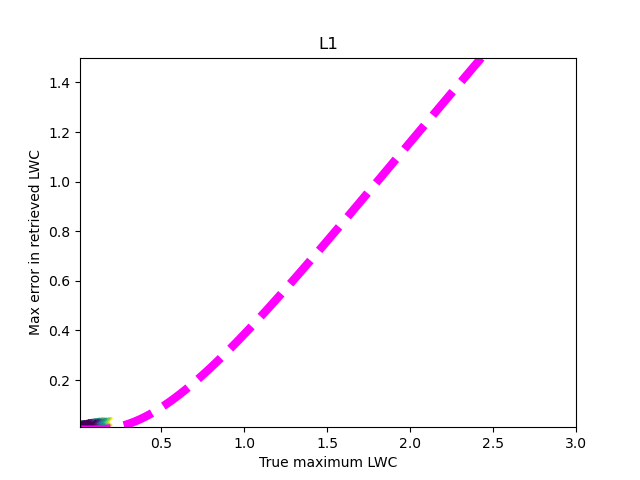

<IPython.core.display.Javascript object>


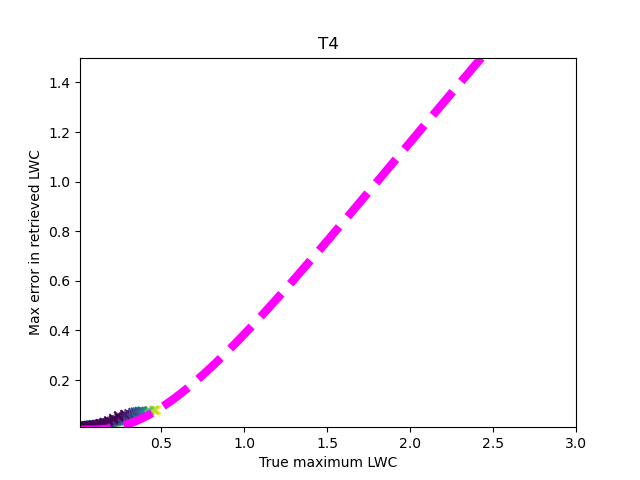

<IPython.core.display.Javascript object>


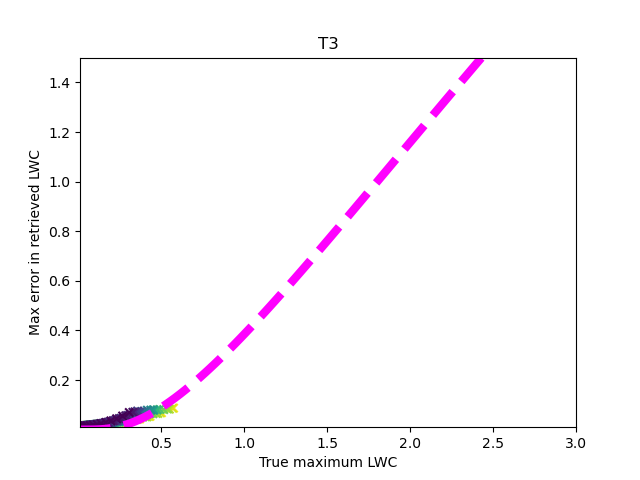

<IPython.core.display.Javascript object>


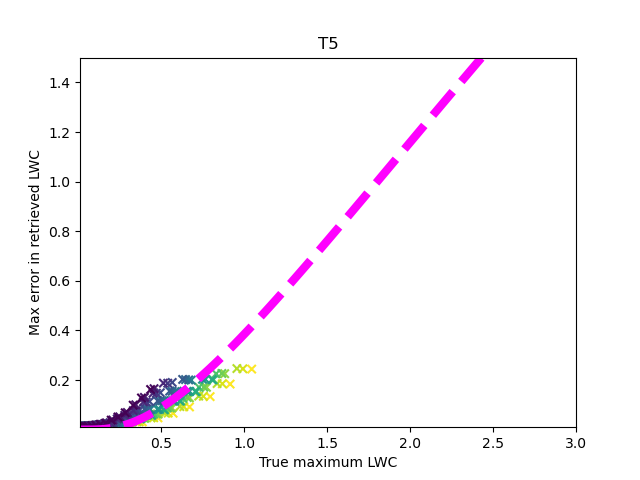

<IPython.core.display.Javascript object>


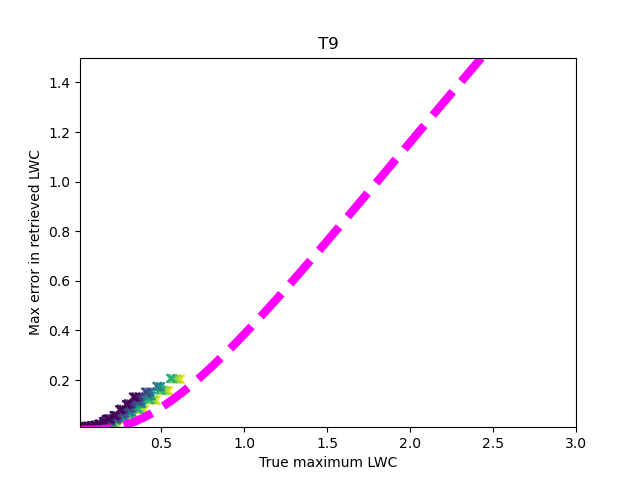

<IPython.core.display.Javascript object>


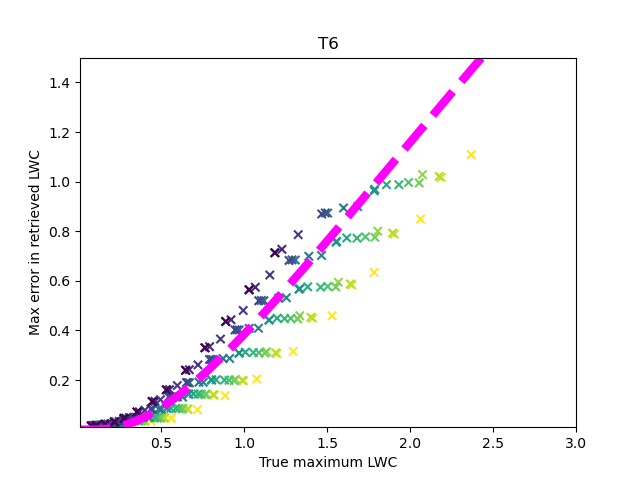

<IPython.core.display.Javascript object>


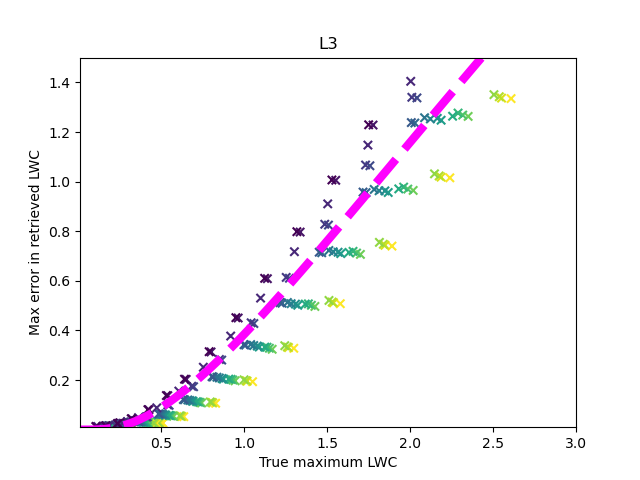

<IPython.core.display.Javascript object>


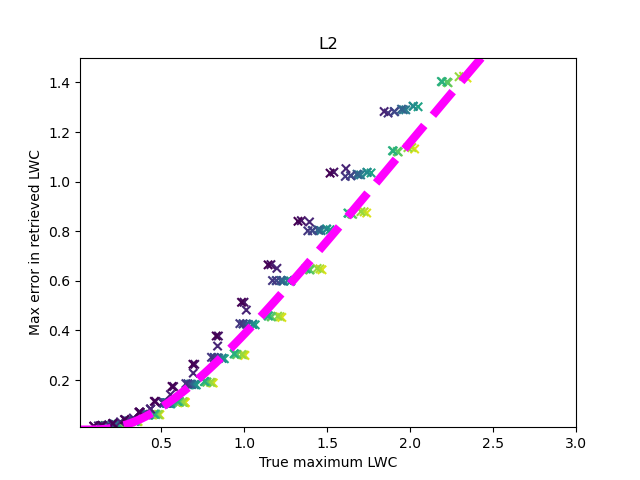

<IPython.core.display.Javascript object>


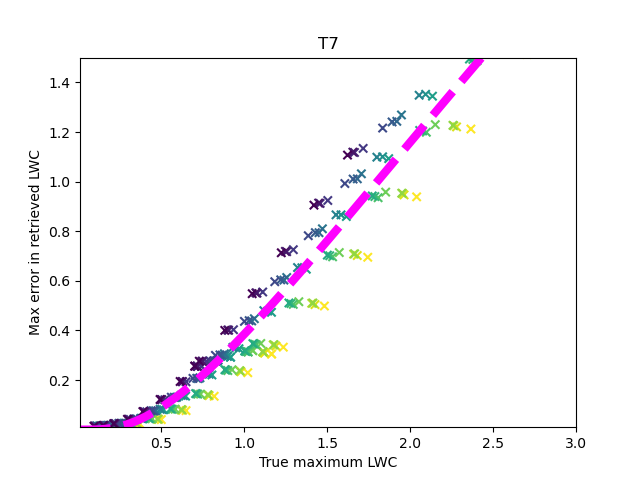

<IPython.core.display.Javascript object>


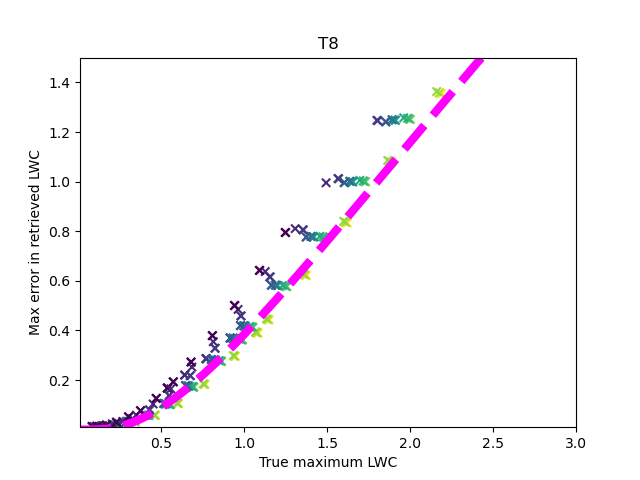

In [113]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
if not os.path.exists('./fig/Delta_Wrs_on_W_true/new/new/beta_fixed/'):
    os.makedirs('./fig/Delta_Wrs_on_W_true/new/new/beta_fixed/')
        
for i, distr in enumerate(base_distributions[::-1]):

    plt.figure()
    
    plt.title(distr['name'])

    d = data.dist(distr['name']).select(beta=distr['beta'], 
                                        nu1=22.2, 
                                        nu2=27)
    W_true = d.get('W_true')
    Delta_Wrs = d.get('Delta_Wrs')
    perc = d.get('required_percentage')
    try:
        perc /= perc.max()
    except ValueError:
        continue
    
#     plt.scatter(means(W_true), means(Delta_Wrs), marker='+', c=perc)
    plt.scatter(maxs(W_true), maxs(Delta_Wrs), marker='x', c=perc)
    
    plt.ylim((0.01, 1.5))
    plt.xlim((0.01, 3))
    
    plt.xlabel('True maximum LWC')
    plt.ylabel('Max error in retrieved LWC')
#     plt.yscale('log')
    
#     plt.savefig('./fig/Delta_Wrs_on_W_true/' + distr['name'] + '.png', dpi=300)
    x = np.linspace(0.01, 3, 100)
    plt.plot(x, 35.2309809 * np.exp(-4.51675947 * np.power(x, -0.40345218)), ls='--', linewidth=6, color='magenta')

    plt.savefig('./fig/Delta_Wrs_on_W_true/new/new/beta_fixed/{}.png'.format(str(i).zfill(2)), dpi=300)

<IPython.core.display.Javascript object>


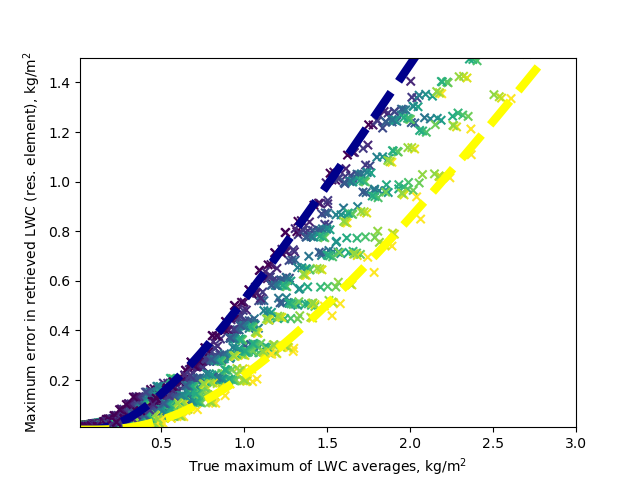

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [13]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

plt.figure()

W_TRUE, PERCENT = [], []
DWRS = []
        
for _, distr in enumerate(base_distributions[::-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27)
    
    W_true, Delta_Wrs, perc = d.get('W_true', 'Delta_Wrs', 'required_percentage')
    
    plt.scatter(maxs(W_true), maxs(Delta_Wrs), marker='x', c=perc / perc.max())
    
    W_TRUE.extend(maxs(W_true))
    PERCENT.extend(perc)
    
    DWRS.extend(maxs(Delta_Wrs))
    
    plt.ylim((0.01, 1.5))
    plt.xlim((0.01, 3))
    
    plt.xlabel(r'True maximum of LWC averages, kg/m$^2$')
    plt.ylabel(r'Maximum error in retrieved LWC (res. element), kg/m$^2$')
    
W_TRUE, PERCENT, DWRS = map(np.asarray, [W_TRUE, PERCENT, DWRS])


def func(x, a0, b0, c0, a1, b1, c1, d1):
    maxw, perc = x
    return (a0 + a1 * perc) * np.exp(-(b0 + b1 * perc) * maxw ** (c0 + c1 * perc))

popt, pcov = curve_fit(func, (W_TRUE, PERCENT), DWRS)

N = 100
x = np.linspace(W_TRUE.min(), W_TRUE.max(), N)

p = np.asarray([0.2] * N)
plt.plot(x, func((x, p), *popt), ls='--', color='darkblue', linewidth=6.0)

p = np.asarray([0.8] * N)
plt.plot(x, func((x, p), *popt), ls='--', color='yellow', linewidth=6.0)

### ЕБАТЬ

In [6]:
data.names

array(['angle', 'distr_no', 'distr_name', 'alpha', 'Dm', 'dm', 'eta',
       'beta', 'cl_bottom', 'xi', 'K', 'required_percentage', 'Q_TRUE',
       'W_TRUE', 'kernel', 'Q_true', 'W_true', 'efl_H', 'freq_pair_no',
       'nu1', 'nu2', 'tb_nu1', 'tb_nu2', 'tau_nu1', 'tau_nu2',
       'efl_tb_nu1', 'efl_tb_nu2', 'efl_tau_nu1', 'efl_tau_nu2', 'Qr',
       'Wr', 'Qrs', 'Wrs', 'Qrss', 'Wrss', 'Delta_Qr', 'Delta_Wr',
       'Delta_Qrs', 'Delta_Wrs', 'Delta_Qrss', 'Delta_Wrss', 'relerr_Qr',
       'relerr_Wr', 'relerr_Qrs', 'relerr_Wrs', 'relerr_Qrss',
       'relerr_Wrss'], dtype=object)

In [6]:
base_distributions = [
    
    {'name': 'T8', 'alpha': 1.485, 'Dm': 4.02, 'dm': 0.06096, 'eta': 1.2, 'beta': 0.4, 'cl_bottom': 1.3716},
    {'name': 'T7', 'alpha': 1.35, 'Dm': 3.733, 'dm': 0.04572, 'eta': 1.2, 'beta': 0.0, 'cl_bottom': 1.24968},
    {'name': 'L2', 'alpha': 1.411, 'Dm': 4.026, 'dm': 0.02286, 'eta': 0.93, 'beta': 0.3, 'cl_bottom': 1.2192},
    
    {'name': 'L3', 'alpha': 1.485, 'Dm': 4.020, 'dm': 0.03048, 'eta': 0.76, 'beta': -0.3, 'cl_bottom': 1.3716},
    {'name': 'T6', 'alpha': 1.398, 'Dm': 3.376, 'dm': 0.03048, 'eta': 0.93, 'beta': -0.1, 'cl_bottom': 1.0668},
    
    {'name': 'T9', 'alpha': 2.485, 'Dm': 2.656, 'dm': 0.04572, 'eta': 1.3, 'beta': 0.3, 'cl_bottom': 1.40208},
    {'name': 'T5', 'alpha': 2.051, 'Dm': 2.574, 'dm': 0.02286, 'eta': 0.85, 'beta': -0.13, 'cl_bottom': 1.11252},
    {'name': 'T3', 'alpha': 2.361, 'Dm': 2.092, 'dm': 0.01524, 'eta': 0.93, 'beta': -0.1, 'cl_bottom': 0.82296},
    {'name': 'T4', 'alpha': 2.703, 'Dm': 2.094, 'dm': 0.02286, 'eta': 0.8, 'beta': 0.0, 'cl_bottom': 0.9144},
    {'name': 'L1', 'alpha': 3.853, 'Dm': 1.448, 'dm': 0.01524, 'eta': 0.98, 'beta': 0.0, 'cl_bottom': 0.54864},
    {'name': 'T2', 'alpha': 4.412, 'Dm': 1.126, 'dm': 0.01524, 'eta': 0.97, 'beta': 0.0, 'cl_bottom': 0.70104},
    {'name': 'T1', 'alpha': 9.07, 'Dm': 0.80485, 'dm': 0.01524, 'eta': 0.89, 'beta': 0.0, 'cl_bottom': 0.67056},
]

<IPython.core.display.Javascript object>


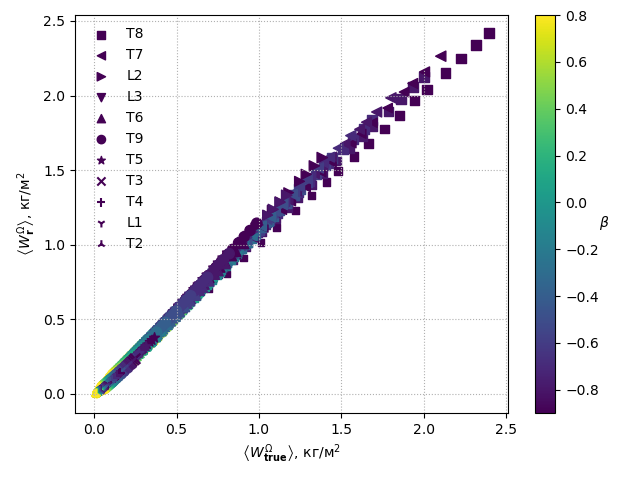

In [231]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(eta=distr['eta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Wr')
    perc = d.get('required_percentage')
    beta = d.get('beta')
    
    beta, x, y, perc = bind(beta, x, y, perc)
    
    sc = plt.scatter(means(x), means(y), c=beta, marker=markers[i], label=distr['name'], 
                     vmin=beta.min(), vmax=beta.max(), s=np.asarray(perc, float) * 80)
    
    plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
    plt.ylabel(r'$\left<W_{\mathrm{\bf{r}}}^{\Omega}\right>$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\beta$', rotation=0)

plt.savefig('Wr_mean_on_W_true_mean_colored_beta.png', dpi=300)

<IPython.core.display.Javascript object>


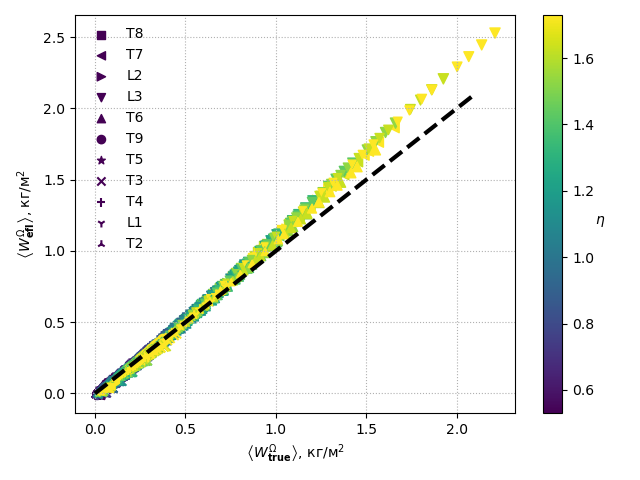

In [7]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Wrss')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), means(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
    plt.ylabel(r'$\left<W_{\mathrm{\bf{efl}}}^{\Omega}\right>$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.1, 2.7)
# plt.xlim(-0.1, 2.6)

x = np.linspace(0, 2.1, 40)
plt.plot(x, x, ls='--', color='black', lw=3)

plt.savefig('Wrss_min_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


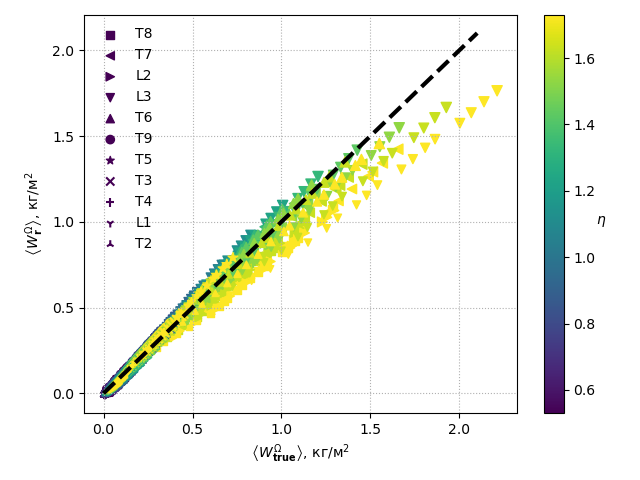

In [8]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Wr')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), means(y), c=eta, marker=markers[i], label=distr['name'],
                     vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
    plt.ylabel(r'$\left<W_{\mathrm{\bf{r}}}^{\Omega}\right>$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

x = np.linspace(0, 2.1, 40)
plt.plot(x, x, ls='--', color='black', lw=3)

plt.savefig('Wr_mean_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


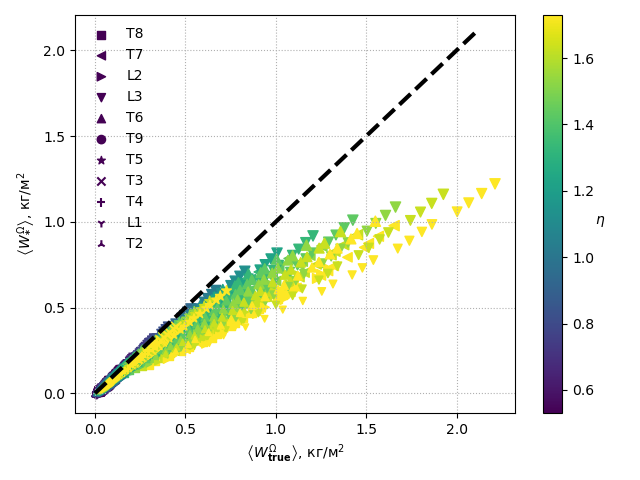

In [9]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    beta = d.get('beta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    perc = np.asarray(perc, dtype=float)
    colors = eta
    sc = plt.scatter(means(x), means(y), c=colors, marker=markers[i], label=distr['name'],
                     vmin=colors.min(), vmax=colors.max(), s=perc * 80)
    
    plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
    plt.ylabel(r'$\left<W_{\mathrm{\bf{*}}}^{\Omega}\right>$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.06, 1.3)
# plt.xlim(-0.06, 2.3)
# x = np.linspace(0, 1.2, 40)
x = np.linspace(0, 2.1, 40)
plt.plot(x, x, ls='--', color='black', lw=3)

plt.savefig('Wrs_mean_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


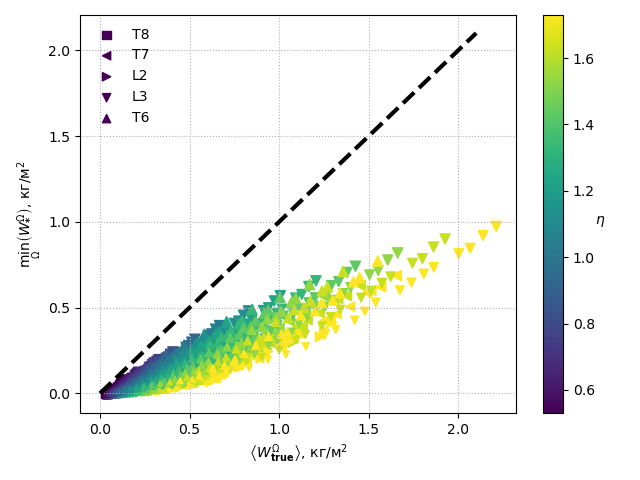

In [10]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), mins(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
    plt.ylabel(r'$\min_{\Omega}\left(W_{\mathrm{\bf{*}}}^{\Omega}\right)$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.1, 2.7)
# plt.xlim(-0.1, 2.6)

x = np.linspace(0, 2.1, 40)
plt.plot(x, x, ls='--', color='black', lw=3)

plt.savefig('Wrs_min_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


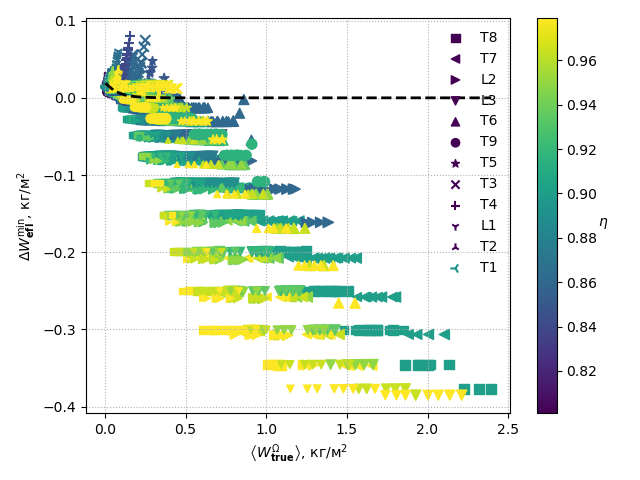

In [287]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']

X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wrss')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), mins(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(mins(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * np.exp(-b * x)

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='black')
    
plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
plt.ylabel(r'$\Delta W_{\mathrm{\bf{efl}}}^{\mathrm{min}}$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.1, 2.7)
# plt.xlim(-0.1, 2.6)

plt.savefig('Delta_Wrs_min_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


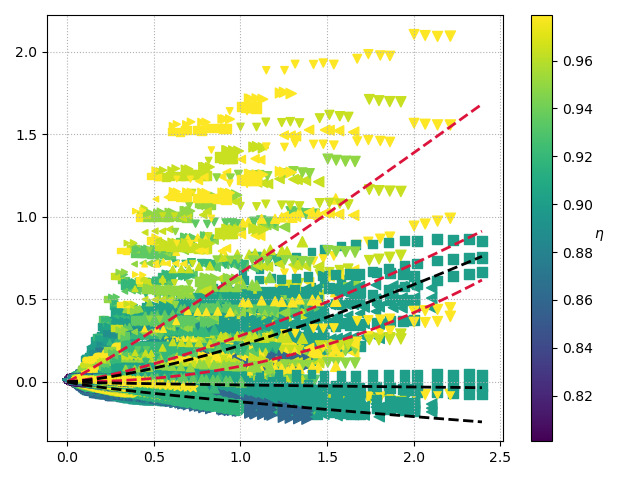

In [18]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']

#Delta_Wrs_mins
X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), mins(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(mins(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='crimson')

#Delta_Wrs_means
X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), means(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(means(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='crimson')

#Delta_Wrs_maxs
X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), maxs(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(maxs(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='crimson')

#################### Wr #############################################
#Delta_Wr_mins
X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wr')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), mins(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(mins(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='black')

#Delta_Wr_means
X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wr')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), means(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(means(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='black')

#Delta_Wr_maxs
X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wr')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), maxs(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(maxs(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='black')

# #################### Wrss #############################################
# #Delta_Wrss_mins
# X, Y = [], []
# for i, distr in enumerate(base_distributions):
# # for i, distr in enumerate(base_distributions[0:5]):
# # for i, distr in enumerate(base_distributions[5:7]):
# # for i, distr in enumerate(base_distributions[7:-1]):

#     d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
#     x, y = d.get('W_true', 'Delta_Wrss')
#     perc = d.get('required_percentage')
#     eta = d.get('eta')
    
#     eta, x, y, perc = bind(eta, x, y, perc)
    
#     sc = plt.scatter(means(x), mins(y), c=eta, marker=markers[i], label=distr['name'],
#                vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
#     X.extend(means(x))
#     Y.extend(mins(y))
    
# X, Y = map(np.asarray, [X, Y])

# def f(x, a, b):
#     return a * x ** b

# popt, _ = curve_fit(f, X, Y)
# x = np.linspace(X.min(), X.max(), 40)
# plt.plot(x, f(x, *popt), ls='--', lw=2, c='cyan')

# #Delta_Wrss_means
# X, Y = [], []
# for i, distr in enumerate(base_distributions):
# # for i, distr in enumerate(base_distributions[0:5]):
# # for i, distr in enumerate(base_distributions[5:7]):
# # for i, distr in enumerate(base_distributions[7:-1]):

#     d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
#     x, y = d.get('W_true', 'Delta_Wrss')
#     perc = d.get('required_percentage')
#     eta = d.get('eta')
    
#     eta, x, y, perc = bind(eta, x, y, perc)
    
#     sc = plt.scatter(means(x), means(y), c=eta, marker=markers[i], label=distr['name'],
#                vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
#     X.extend(means(x))
#     Y.extend(means(y))
    
# X, Y = map(np.asarray, [X, Y])

# def f(x, a, b):
#     return a * x ** b

# popt, _ = curve_fit(f, X, Y)
# x = np.linspace(X.min(), X.max(), 40)
# plt.plot(x, f(x, *popt), ls='--', lw=2, c='cyan')

# #Delta_Wrss_maxs
# X, Y = [], []
# for i, distr in enumerate(base_distributions):
# # for i, distr in enumerate(base_distributions[0:5]):
# # for i, distr in enumerate(base_distributions[5:7]):
# # for i, distr in enumerate(base_distributions[7:-1]):

#     d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
#     x, y = d.get('W_true', 'Delta_Wrss')
#     perc = d.get('required_percentage')
#     eta = d.get('eta')
    
#     eta, x, y, perc = bind(eta, x, y, perc)
    
#     sc = plt.scatter(means(x), maxs(y), c=eta, marker=markers[i], label=distr['name'],
#                vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
#     X.extend(means(x))
#     Y.extend(maxs(y))
    
# X, Y = map(np.asarray, [X, Y])

# def f(x, a, b):
#     return a * x ** b

# popt, _ = curve_fit(f, X, Y)
# x = np.linspace(X.min(), X.max(), 40)
# plt.plot(x, f(x, *popt), ls='--', lw=2, c='cyan')
    
# plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
# plt.ylabel(r'$\Delta W_{*}^{\mathrm{min}}$, кг/м$^2$')

# plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.1, 2.7)
# plt.xlim(-0.1, 2.6)

plt.savefig('Delta_Wrs_min_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


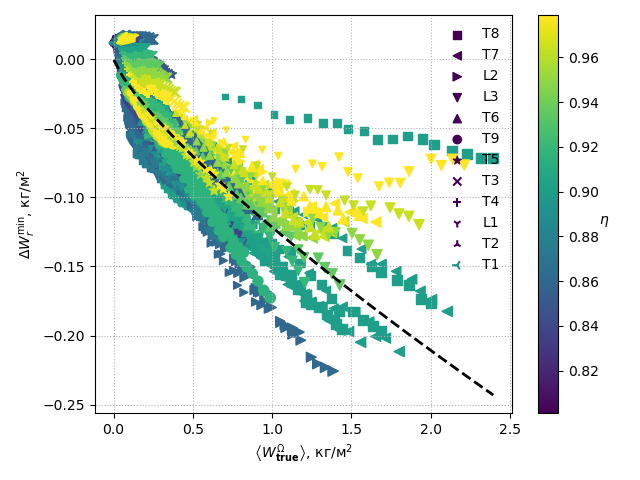

In [289]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']

X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wr')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), mins(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(mins(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='black')
    
plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
plt.ylabel(r'$\Delta W_{r}^{\mathrm{min}}$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.1, 2.7)
# plt.xlim(-0.1, 2.6)

plt.savefig('Delta_Wrs_min_on_W_true_mean_colored_eta.png', dpi=300)

<IPython.core.display.Javascript object>


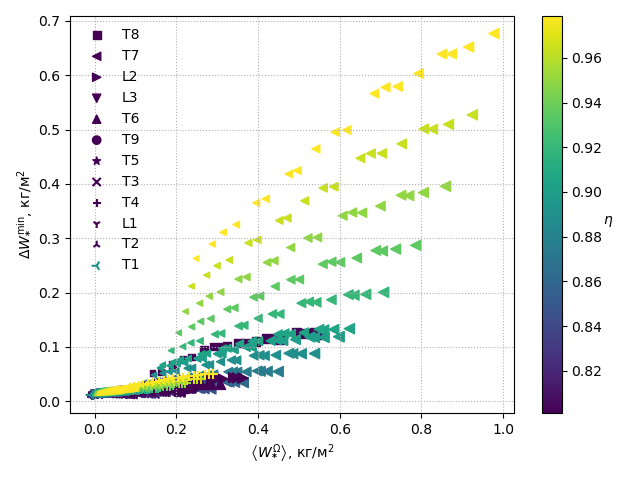

/tmp/ipykernel_65527/3725731211.py:31: RuntimeWarning: invalid value encountered in power
  return a * x ** b
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [301]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']

X, Y = [], []
for i, distr in enumerate(base_distributions):
# for i, distr in enumerate(base_distributions[0:5]):
# for i, distr in enumerate(base_distributions[5:7]):
# for i, distr in enumerate(base_distributions[7:-1]):

    d = data.dist(distr['name']).select(beta=0.0, nu1=22.2, nu2=27)
    
    x, y = d.get('Wrs', 'Delta_Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    
    sc = plt.scatter(means(x), means(y), c=eta, marker=markers[i], label=distr['name'],
               vmin=eta.min(), vmax=eta.max(), s=np.asarray(perc, float) * 80)
    
    X.extend(means(x))
    Y.extend(means(y))
    
X, Y = map(np.asarray, [X, Y])

def f(x, a, b):
    return a * x ** b

popt, _ = curve_fit(f, X, Y)
x = np.linspace(X.min(), X.max(), 40)
plt.plot(x, f(x, *popt), ls='--', lw=2, c='black')
    
plt.xlabel(r'$\left<W_{\mathrm{\bf{*}}}^{\Omega}\right>$, кг/м$^2$')
plt.ylabel(r'$\Delta W_{\mathrm{\bf{*}}}^{\mathrm{min}}$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.ylim(-0.1, 2.7)
# plt.xlim(-0.1, 2.6)

plt.savefig('Delta_Wrs_min_on_W_true_mean_colored_eta.png', dpi=300)

In [226]:
np.unique(data.get('required_percentage'))

array([0.2, 0.22631578947368422, 0.25263157894736843, 0.2789473684210526,
       0.30526315789473685, 0.3315789473684211, 0.35789473684210527,
       0.38421052631578945, 0.4105263157894737, 0.4368421052631579,
       0.4631578947368421, 0.48947368421052634, 0.5157894736842106,
       0.5421052631578946, 0.5684210526315789, 0.5947368421052632,
       0.6210526315789473, 0.6473684210526316, 0.6736842105263158, 0.7],
      dtype=object)

<IPython.core.display.Javascript object>


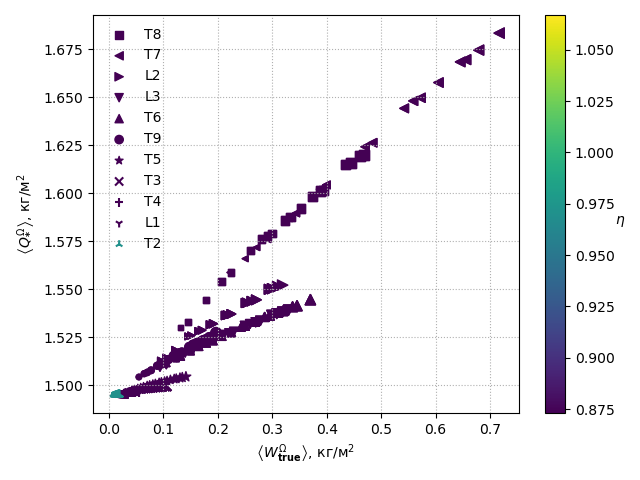

Text(0, 0.5, '$\\eta$')

In [228]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], eta=distr['eta'], 
                                        nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Qrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    beta = d.get('beta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    perc = np.asarray(perc, dtype=float)
    colors = eta
    sc = plt.scatter(means(x), means(y), c=colors, marker=markers[i], label=distr['name'],
                     vmin=colors.min(), vmax=colors.max(), s=perc * 80)
    
    plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
    plt.ylabel(r'$\left<Q_{\mathrm{\bf{*}}}^{\Omega}\right>$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

<IPython.core.display.Javascript object>


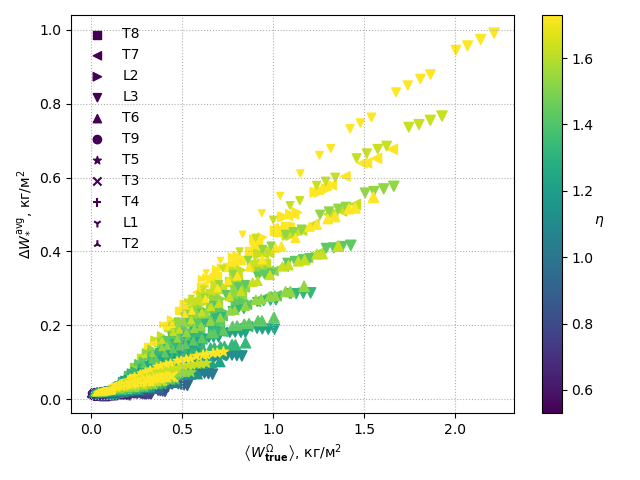

Text(0, 0.5, '$\\eta$')

In [186]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    beta = d.get('beta')
    
    eta, x, y, perc = bind(eta, x, y, perc)
    perc = np.asarray(perc, dtype=float)
    colors = eta
    sc = plt.scatter(means(x), means(y), c=colors, marker=markers[i], label=distr['name'],
                     vmin=colors.min(), vmax=colors.max(), s=perc * 80)
    
plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
plt.ylabel(r'$\Delta W_{*}^{\mathrm{avg}}$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\eta$', rotation=0)

# plt.yscale('log')

<IPython.core.display.Javascript object>


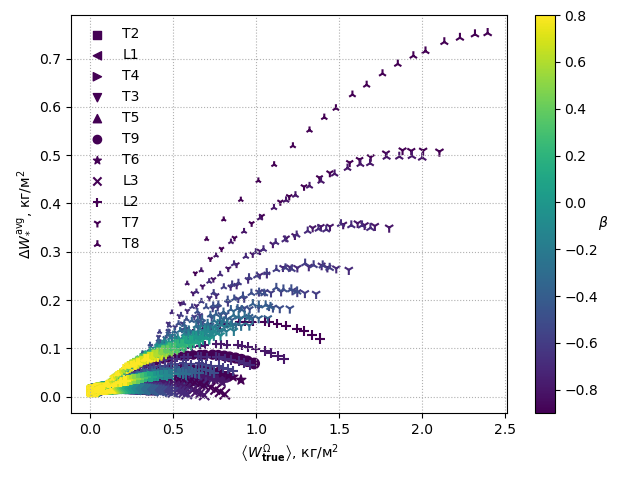

Text(0, 0.5, '$\\beta$')

In [189]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
for i, distr in enumerate(base_distributions[:-1][::-1]):

    d = data.dist(distr['name']).select(eta=distr['eta'], nu1=22.2, nu2=27)
    
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    eta = d.get('eta')
    beta = d.get('beta')
    
    beta, x, y, perc = bind(beta, x, y, perc)
    perc = np.asarray(perc, dtype=float)
    colors = beta
    sc = plt.scatter(means(x), means(y), c=colors, marker=markers[i], label=distr['name'],
                     vmin=colors.min(), vmax=colors.max(), s=perc * 80)
    
plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
plt.ylabel(r'$\Delta W_{*}^{\mathrm{avg}}$, кг/м$^2$')

plt.legend(loc='best', frameon=False)

fig.tight_layout()

plt.grid(ls=':')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r'$\beta$', rotation=0)

# plt.yscale('log')

In [32]:
np.unique(data.get('required_percentage'))

array([0.2, 0.22631578947368422, 0.25263157894736843, 0.2789473684210526,
       0.30526315789473685, 0.3315789473684211, 0.35789473684210527,
       0.38421052631578945, 0.4105263157894737, 0.4368421052631579,
       0.4631578947368421, 0.48947368421052634, 0.5157894736842106,
       0.5421052631578946, 0.5684210526315789, 0.5947368421052632,
       0.6210526315789473, 0.6473684210526316, 0.6736842105263158, 0.7],
      dtype=object)

<IPython.core.display.Javascript object>


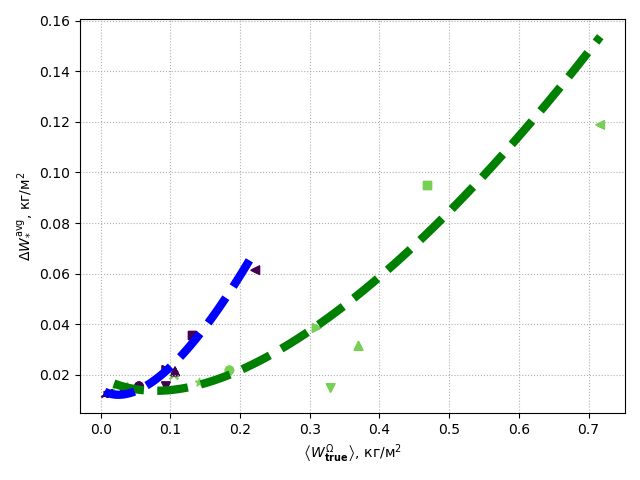

In [185]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
from scipy.optimize import curve_fit

fig, ax = plt.subplots()

def op(a):
    return means(a)
     
markers = ['s', '<', '>', 'v', '^', 'o', '*', 'x', '+', '1', '2', '3', '4']
X, Y = [], []
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], eta=distr['eta'], nu1=22.2, nu2=27, 
                                        required_percentage=0.6736842105263158
                                       )
#     d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27, 
#                                         required_percentage=0.6736842105263158
#                                        )
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    
    sc = plt.scatter(op(x), op(y), c=perc, 
                     marker=markers[i], label=distr['name'],
                    vmin=0.2, vmax=0.8)
    X.extend(op(x))
    Y.extend(op(y))
    
X, Y = map(np.asarray, [X, Y])

def func(x, a, b, c, d):
    return a * np.exp(-b * x) + c * x ** d

# popt67, pcov = curve_fit(func, X, Y)
x = np.linspace(X.min(), X.max(), 100)
plt.plot(x, func(x, *popt67), ls='--', color='green', linewidth=6.0)
    
X, Y = [], []
for i, distr in enumerate(base_distributions[:-1]):

    d = data.dist(distr['name']).select(beta=distr['beta'], eta=distr['eta'], nu1=22.2, nu2=27, 
                                        required_percentage=0.2
                                       )
#     d = data.dist(distr['name']).select(beta=distr['beta'], nu1=22.2, nu2=27, 
#                                         required_percentage=0.2
#                                        )
    
    x, y = d.get('W_true', 'Delta_Wrs')
    perc = d.get('required_percentage')
    
    sc = plt.scatter(op(x), op(y), c=perc, 
                     marker=markers[i], label=distr['name'],
                    vmin=0.2, vmax=0.8)
    X.extend(op(x))
    Y.extend(op(y))
    
X, Y = map(np.asarray, [X, Y])

# popt20, pcov = curve_fit(func, X, Y)
x = np.linspace(X.min(), X.max(), 100)
plt.plot(x, func(x, *popt20), ls='--', color='blue', linewidth=6.0)
    
plt.xlabel(r'$\left<W_{\mathrm{\bf{true}}}^{\Omega}\right>$, кг/м$^2$')
plt.ylabel(r'$\Delta W_{*}^{\mathrm{avg}}$, кг/м$^2$')

fig.tight_layout()

plt.grid(ls=':')

In [ ]:
###################################################################################################

<IPython.core.display.Javascript object>


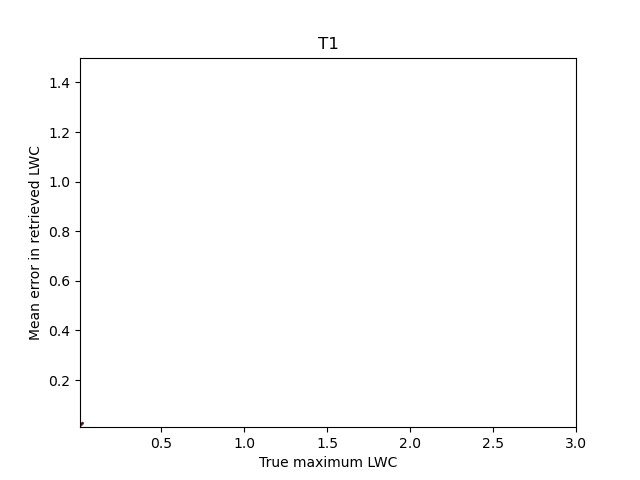

<IPython.core.display.Javascript object>


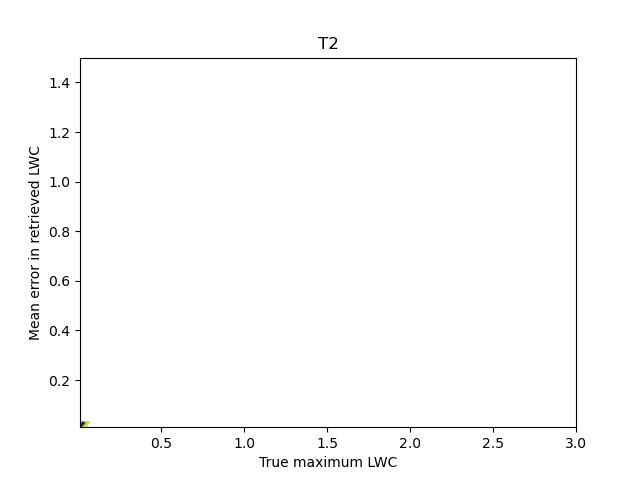

<IPython.core.display.Javascript object>


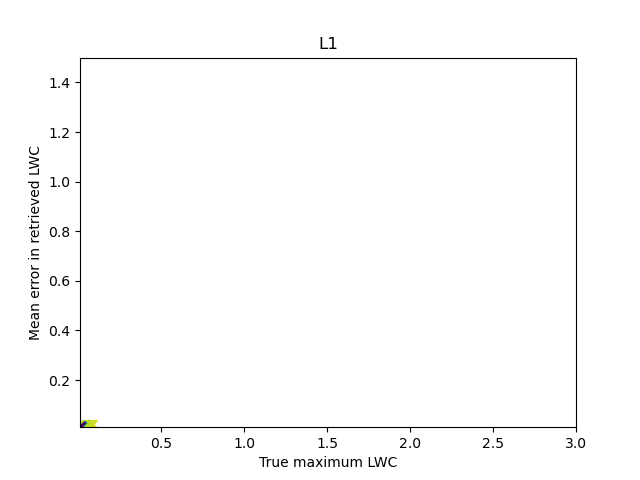

<IPython.core.display.Javascript object>


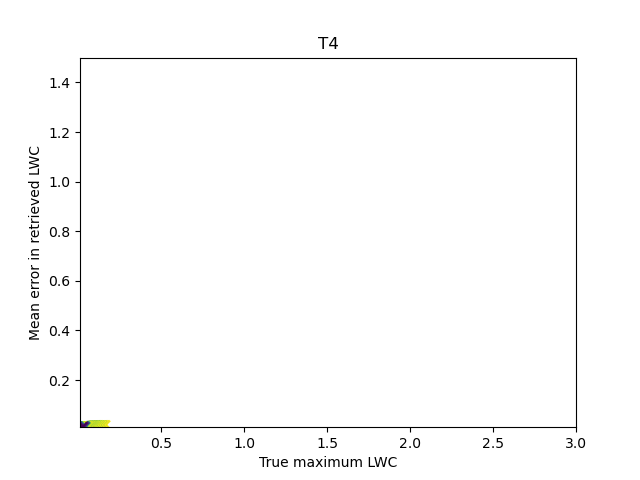

<IPython.core.display.Javascript object>


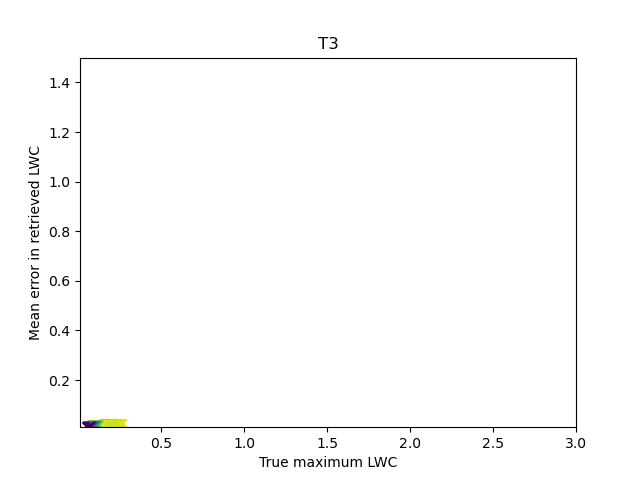

<IPython.core.display.Javascript object>


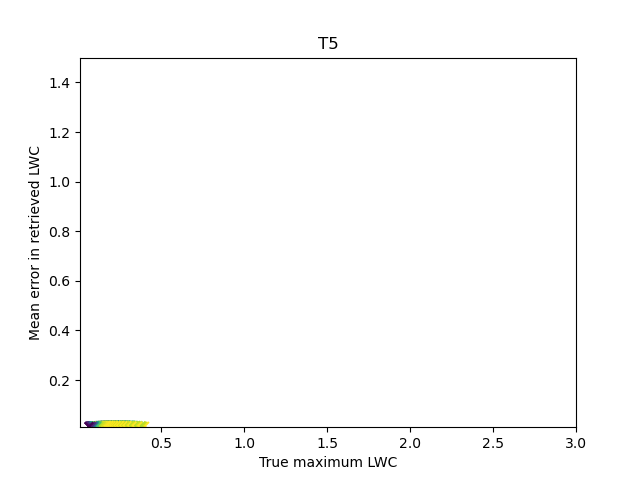

<IPython.core.display.Javascript object>


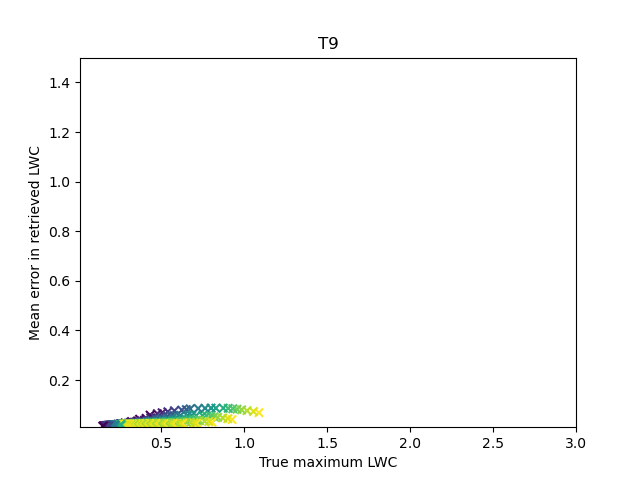

<IPython.core.display.Javascript object>


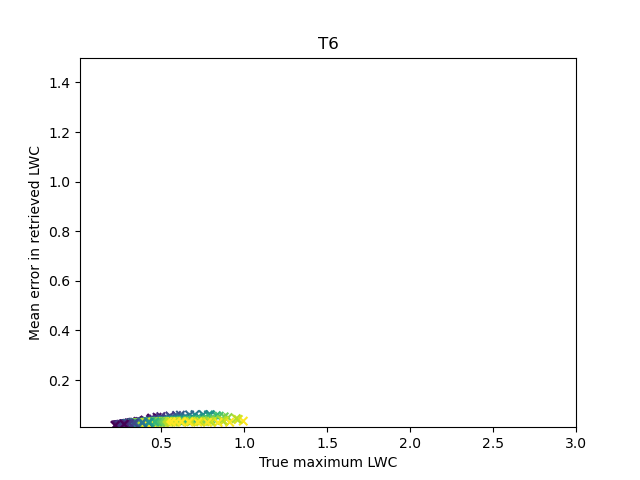

<IPython.core.display.Javascript object>


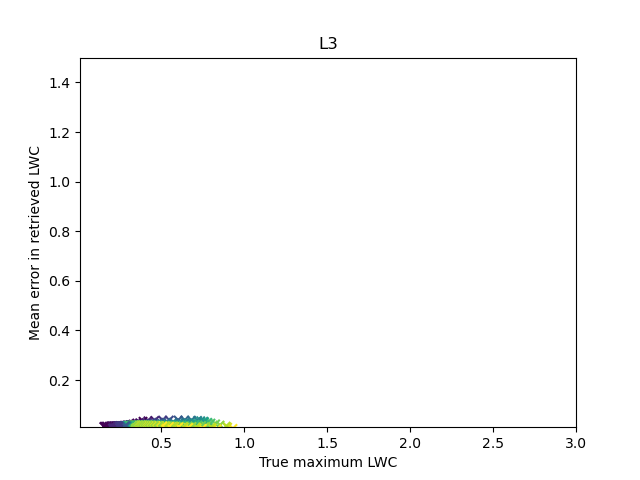

<IPython.core.display.Javascript object>


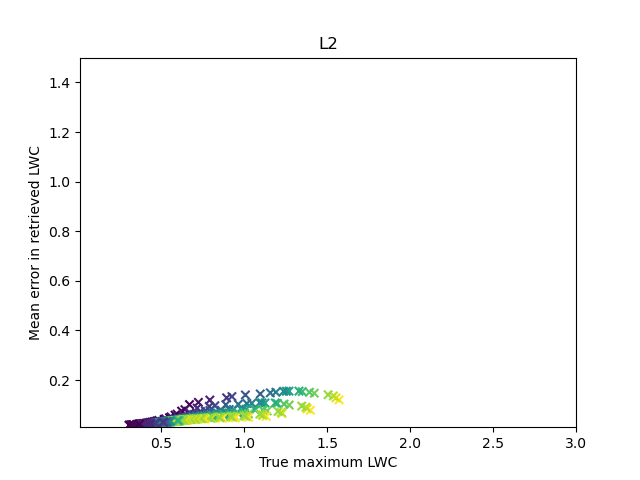

<IPython.core.display.Javascript object>


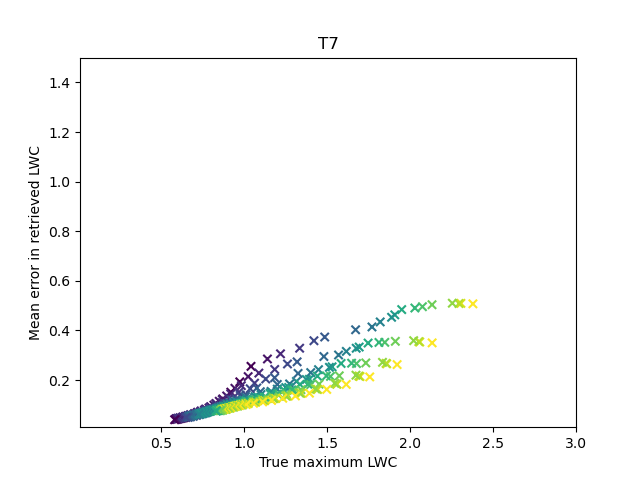

<IPython.core.display.Javascript object>


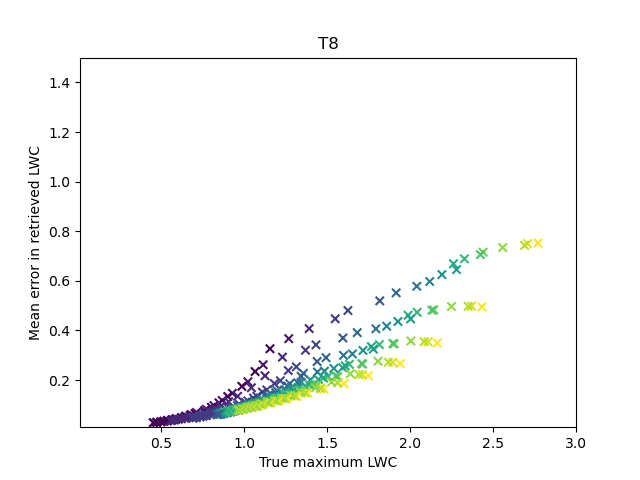

In [78]:
if not os.path.exists('./fig/Delta_Wrs_on_W_true/new/eta_fixed/'):
    os.makedirs('./fig/Delta_Wrs_on_W_true/new/eta_fixed/')
        
for i, distr in enumerate(base_distributions[::-1]):

    plt.figure()
    
    plt.title(distr['name'])

    d = data.dist(distr['name']).select(eta=distr['eta'], nu1=22.2, nu2=27)
    W_true = d.get('W_true')
    Delta_Wrs = d.get('Delta_Wrs')
    perc = d.get('required_percentage')
    try:
        perc /= perc.max()
    except ValueError:
        continue
    
#     plt.scatter(means(W_true), means(Delta_Wrs), marker='+', c=perc)
    plt.scatter(maxs(W_true), means(Delta_Wrs), marker='x', c=perc)
    
    plt.ylim((0.01, 1.5))
    plt.xlim((0.01, 3))
    
    plt.xlabel('True maximum LWC')
    plt.ylabel('Mean error in retrieved LWC')
#     plt.yscale('log')
    
#     plt.savefig('./fig/Delta_Wrs_on_W_true/' + distr['name'] + '.png', dpi=300)
    plt.savefig('./fig/Delta_Wrs_on_W_true/new/eta_fixed/{}.png'.format(str(i).zfill(2)), dpi=300)

<IPython.core.display.Javascript object>


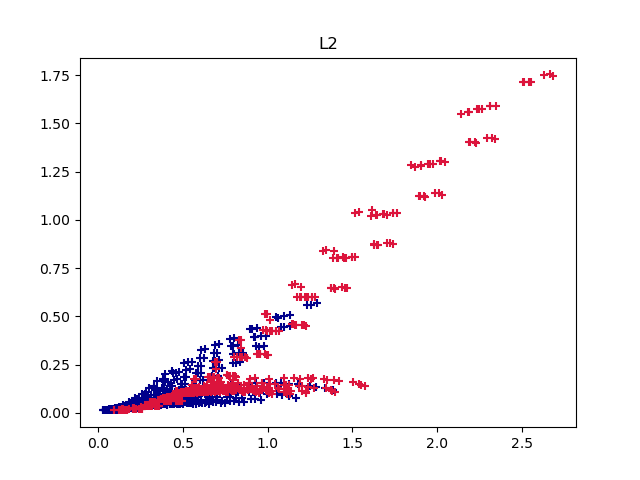

<IPython.core.display.Javascript object>


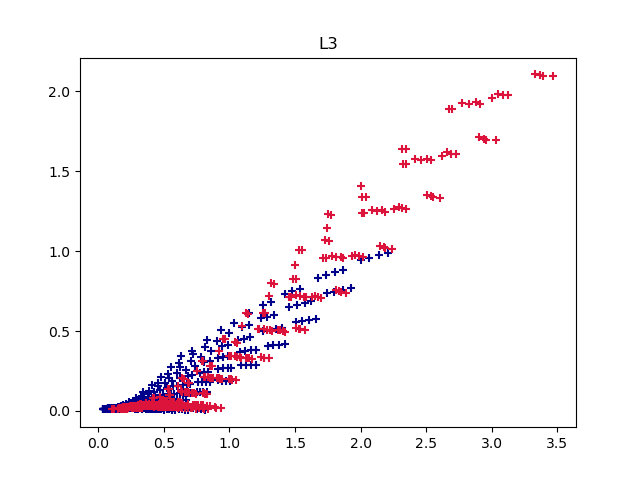

<IPython.core.display.Javascript object>


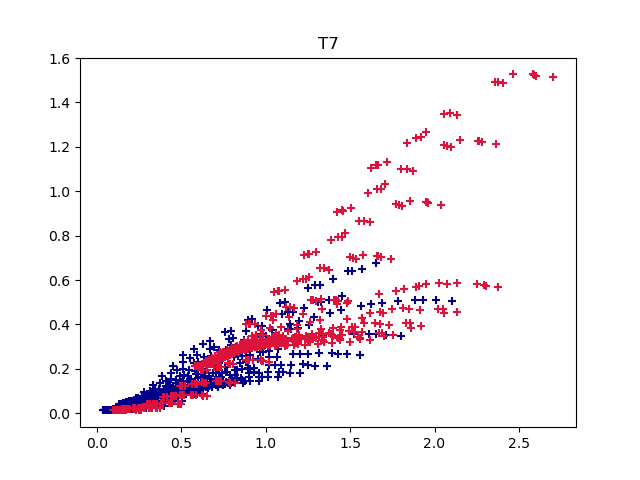

<IPython.core.display.Javascript object>


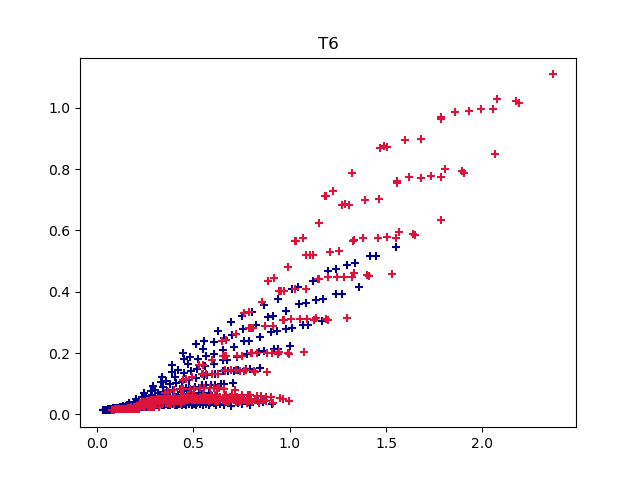

<IPython.core.display.Javascript object>


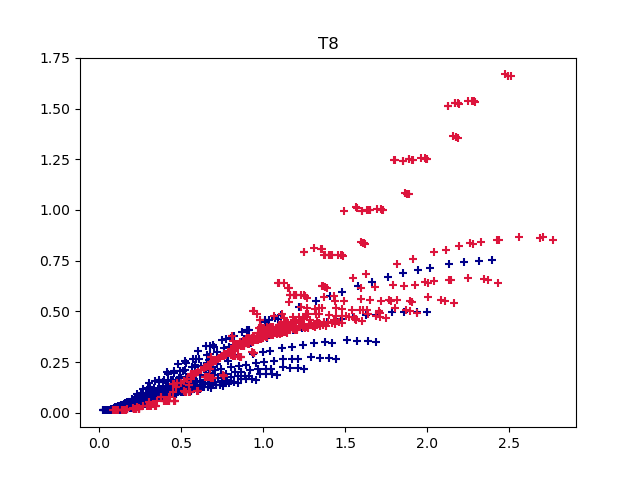

<IPython.core.display.Javascript object>


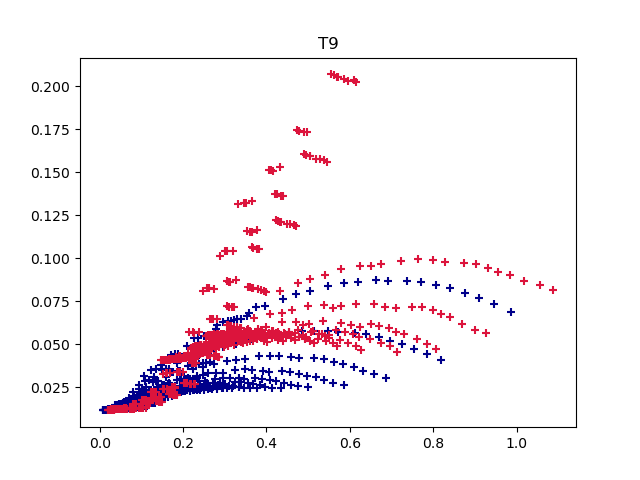

<IPython.core.display.Javascript object>


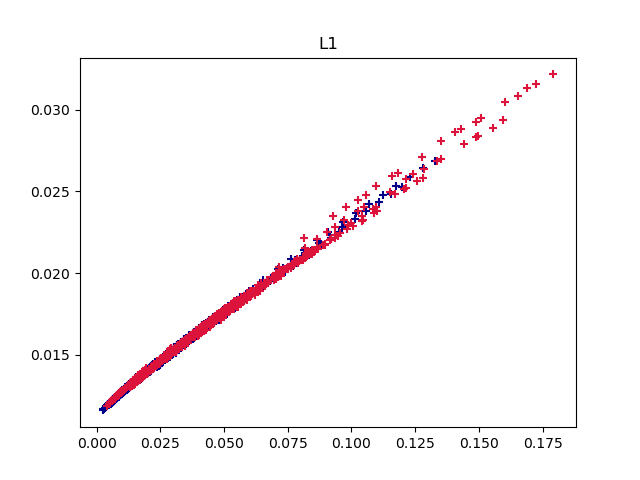

/tmp/ipykernel_32503/3612960264.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


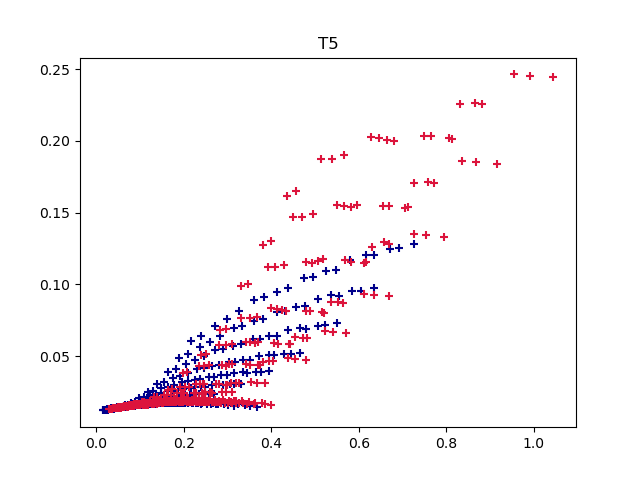

<IPython.core.display.Javascript object>


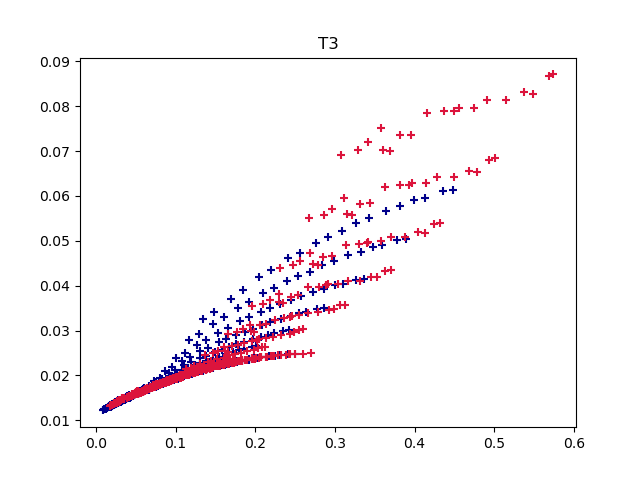

<IPython.core.display.Javascript object>


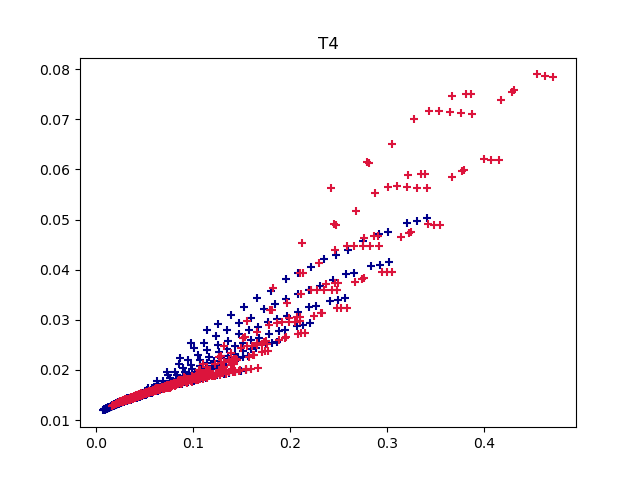

<IPython.core.display.Javascript object>


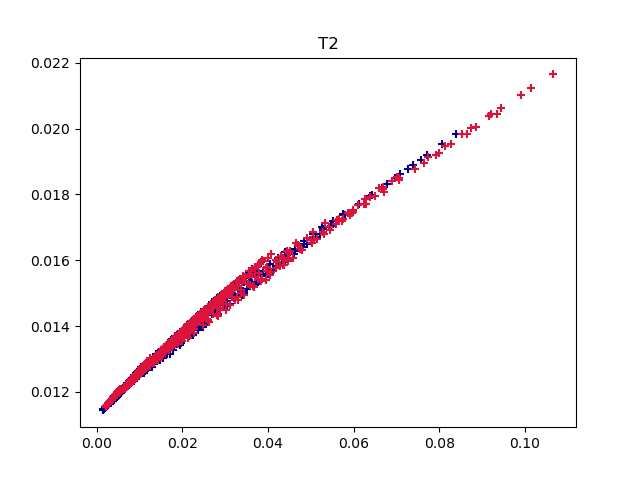

<IPython.core.display.Javascript object>


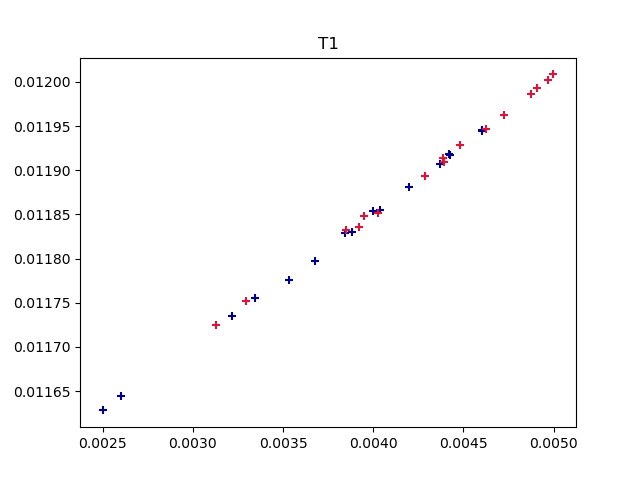

In [42]:

for distr in base_distributions:

    plt.figure()
    
    plt.title(distr['name'])

    d = data.dist(distr['name']).select(nu1=22.2, nu2=27)
    W_true = d.get('W_true')
    Delta_Wrs = d.get('Delta_Wrs')

    plt.scatter(means(W_true), means(Delta_Wrs), marker='+', color='darkblue')
    plt.scatter(maxs(W_true), maxs(Delta_Wrs), marker='+', color='crimson')

<IPython.core.display.Javascript object>


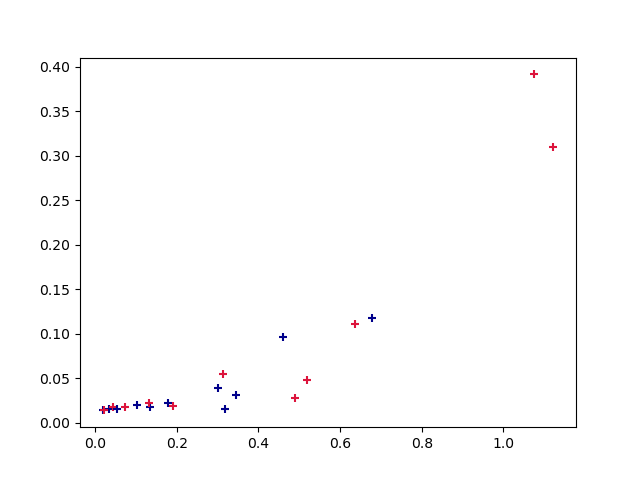

In [18]:
plt.figure()

for distr in base_distributions:
    d = data.select(distr_name=distr['name'], required_percentage=0.6473684210526316, nu1=22.2, nu2=27)
    W_true = d.get('W_true')
    Delta_Wrs = d.get('Delta_Wrs')

    plt.scatter(means(W_true), means(Delta_Wrs), marker='+', color='darkblue')
    plt.scatter(maxs(W_true), maxs(Delta_Wrs), marker='+', color='crimson')